In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
df= pd.read_csv("/content/DELL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,21.777945,22.993132,21.693752,22.440264,21.538488,13801490
1,2017-12-04,22.504812,22.521650,20.952852,21.017401,20.172800,8513645
2,2017-12-05,20.927595,21.278399,20.644144,20.899530,20.059671,6129126
3,2017-12-06,20.767628,21.182980,20.697468,21.065109,20.218594,7828790
4,2017-12-07,21.278399,21.601139,21.205433,21.298044,20.442167,7163534
...,...,...,...,...,...,...,...
1386,2023-06-07,46.860001,47.779999,46.770000,47.660000,47.660000,4096000
1387,2023-06-08,47.990002,48.099998,47.200001,47.889999,47.889999,3976100
1388,2023-06-09,48.090000,48.669998,47.590000,47.610001,47.610001,3293500
1389,2023-06-12,47.720001,48.119999,47.619999,48.070000,48.070000,3596800


In [14]:
start_date = '2017-12-01'
end_date = '2023-06-13'
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [15]:
days = [i for i in range(1, len(df['Close'])+1)]
price_orig = df['Close'].tolist()
change = df['Close'].pct_change().tolist()
change = change[1:]

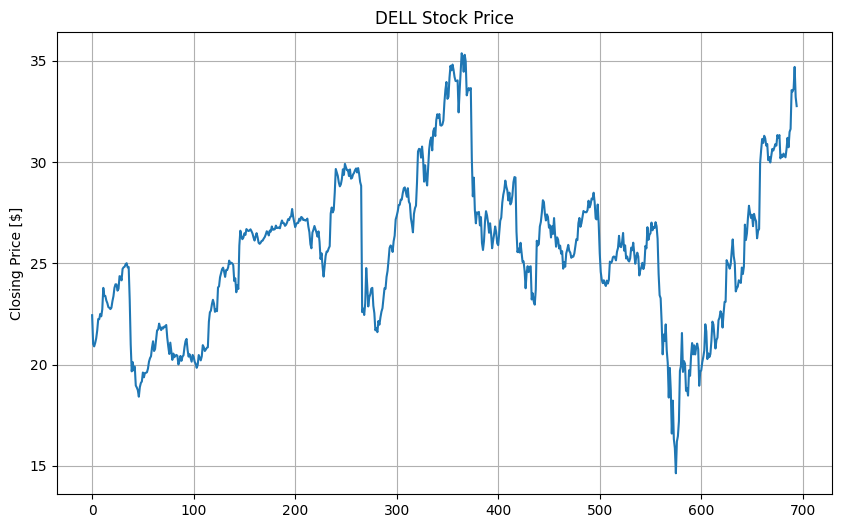

In [16]:
train_data['Close'].plot(title="DELL Stock Price", ylabel= "Closing Price [$]", figsize=[10, 6])
plt.grid()

In [17]:
mean = np.mean(change)
std_dev = np.std(change)
print('\nMean percent change: ' + str(round(mean*100, 2)) + '%')
print('Standard Deviation of percent change: ' + str(round(std_dev*100, 2)) + '%')


Mean percent change: 0.09%
Standard Deviation of percent change: 2.4%


In [18]:
simulations = 1
days_to_sim = 1*252
close_end = []
above_close = []

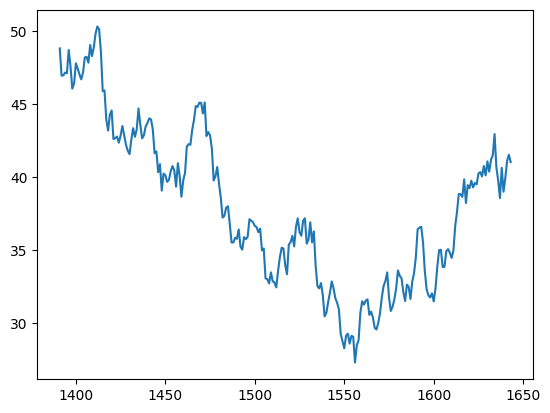

In [19]:
for i in range(simulations):
   num_days = [days[-1]]
   close_price = [df.iloc[-1, 4]]
   for j in range(days_to_sim):
     num_days.append(num_days[-1]+1)
     perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
     close_price.append(close_price[-1]*(1+perc_change))


   if close_price[-1] > price_orig[-1]:
     above_close.append(1)
   else:
      above_close.append(0)
   close_end.append(close_price[-1])
   plt.plot(num_days, close_price)

In [20]:

average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price- price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations
print('\nPredicted closing price after ' + str(simulations) + ' simulations: $' + str(round(average_closing_price, 2)))
print('Predicted percent increase after 1 year: ' + str(round(average_perc_change*100, 2)) + '%')
print('Probability of stock price increasing after 1 year: ' + str(round(probability_of_increase*100, 2)) + '%')
plt.show()


Predicted closing price after 1 simulations: $41.02
Predicted percent increase after 1 year: -15.94%
Probability of stock price increasing after 1 year: 0.0%


In [21]:
mean_end_price = round(np.mean(close_price),2)
print("Expected price: ", str(mean_end_price))

Expected price:  37.98


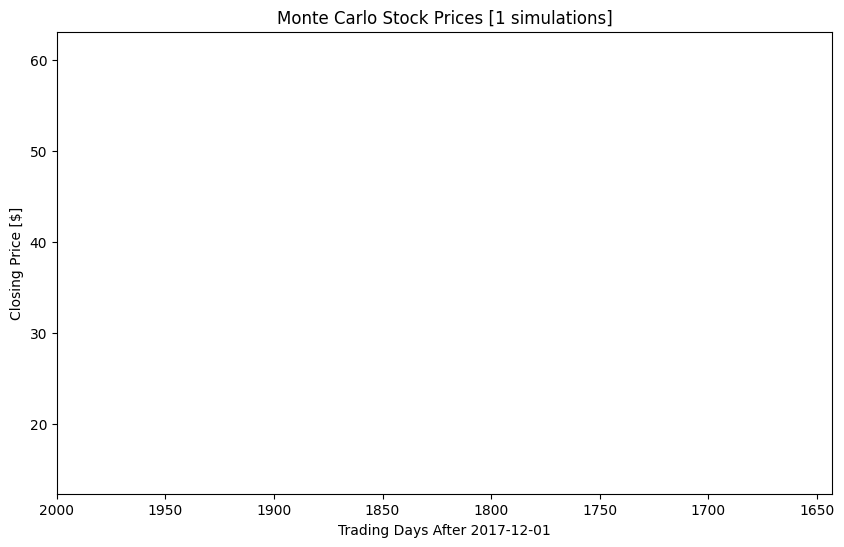

In [22]:
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + " simulations]")
plt.xlabel("Trading Days After " + start_date  )
plt.ylabel("Closing Price [$]")
plt.xlim([2000, len(days)+days_to_sim])
plt.show()

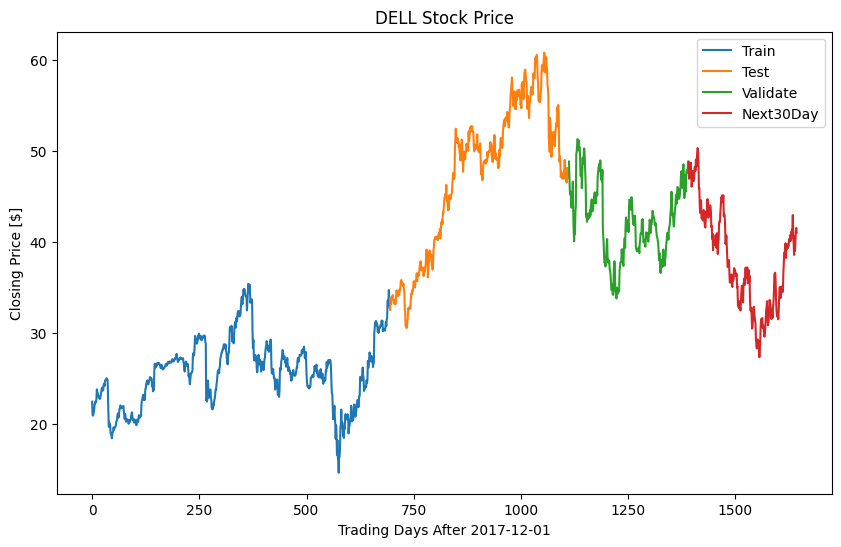

In [23]:

plt.xlabel("Trading Days After " + start_date  )
plt.ylabel("Closing Price [$]")
train_data['Close'].plot(title="DELL Stock Price", ylabel= "Closing Price [$]", figsize=[10, 6])
test_data['Close'].plot(title="DELL Stock Price", ylabel= "Closing Price [$]", figsize=[10, 6])
val_data['Close'].plot(title="DELL Stock Price", ylabel= "Closing Price [$]", figsize=[10, 6])
plt.plot(num_days, close_price)
plt.legend(['Train', 'Test','Validate','Next30Day'])
plt.show()